In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
datasets = ('3A4', 'CB1', 'DPP4', 'HIVINT', 'HIVPROT', 'LOGD', 'METAB', 'NK1', 'OX1', 'OX2', 'PGP', 'PPB', 'RAT_F', 'TDI', 'THROMBIN')

In [19]:
# test building model with using one of the dataset
dataset = 'METAB'
train = pd.read_csv('./merck.data/csv/%s_training_disguised.csv' % dataset)
test = pd.read_csv('./merck.data//csv/%s_test_disguised.csv' % dataset)

In [20]:
# only use classifiers exists in both train and test sets
cols = set(train.columns)
cols = cols.intersection(set(test.columns))
print(len(cols), "unique descriptors")

3248 unique descriptors


In [21]:
train.head()

,MOLECULE,Act,D_36,D_37,D_38,D_39,D_41,D_42,D_43,D_44,...,D_10736,D_10737,D_10738,D_10740,D_10741,D_10743,D_10744,D_10745,D_10746,D_10763
0,M_5058,70.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M_6406,74.68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M_12634,2.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M_17594,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M_17627,73.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# use first 75% of data; time-split
l = len(train)
#train_x = train[:int(l*0.75)].filter(cols).drop(['MOLECULE', 'Act'], axis=1)
#train_y = train[:int(l*0.75)].filter(['Act']).values.ravel()

# for testing, we will use all data
train_x = train.filter(cols).drop(['MOLECULE', 'Act'], axis=1)
train_y = train.filter(['Act']).values.ravel()
test_x = test.filter(cols).drop(['MOLECULE', 'Act'], axis=1)
test_y = test.filter(['Act']).values.ravel()

In [10]:
from sklearn.ensemble import RandomForestRegressor
# RF parameters
# 1. n_estimator = 100
# 2. maximum feature = m/3, m = number of unique features
# 3. minimum sample split = 5
m = len(cols)
rf = RandomForestRegressor(n_estimators=100, max_features=int(m/3), min_samples_split=5, n_jobs=3)
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1082, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred = rf.predict(test_x)

In [12]:
def Rsquared(x, y):
    avx = np.average(x)
    avy = np.average(y)
    num = np.sum( (x-avx)*(y-avy) )**2
    denom = np.sum( (x-avx)**2 ) * np.sum( (y-avy)**2 )
    return num/denom

In [13]:
Rsquared(test_y, y_pred)

0.6351867450061599

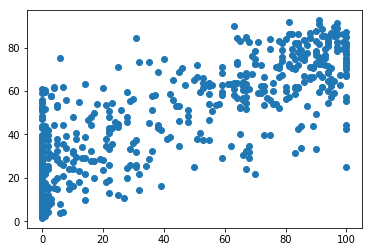

In [14]:
plt.scatter(test_y, y_pred)

In [15]:
# some test activities are negative for -log(IC50), which does not makes sense... (wrong data??)
idx = np.logical_and(test_y > 0, test_y < 10)
Rsquared(test_y[idx], y_pred[idx])

0.014695320717199298